# Продвинутый вариант выполнения задания

## Импортируем необходимые для начала модули и подгружаем наши датасеты

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

Выше можно видеть подключение модуля warnings и вызов функции из него.
Это сделано для того, чтобы при вызове каких-либо функций лишние предупреждения неограниченной длины не мешали восприятию информации.

In [2]:
df = pd.read_csv('/content/drive/MyDrive/src_2hw/orders.csv')
products_df = pd.read_csv('/content/drive/MyDrive/src_2hw/products.csv')
regions_df = pd.read_csv('/content/drive/MyDrive/src_2hw/regions.csv')
stores_df = pd.read_csv('/content/drive/MyDrive/src_2hw/stores.csv')

Таблица orders.csv - наш основной dataset, используемый бОльшую часть времени. Поэтому его обозначим за df.

In [3]:
df.head() # Вызовем первые строки датасеты для того, чтобы понять структуру

,Unnamed: 0,store_id,order_id,product_id,price,profit,delivery_distance,date_create,order_start_prepare,planned_prep_time,order_ready,order_pickup,region_id,status_id
0,0,5014,20562761,41,7.04,45.504,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,05-09-2024 16:00:00,683,F
1,1,5014,20562761,31,23.45,45.504,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,05-09-2024 16:00:00,683,F
2,2,3856,20562753,7,51.94,30.336,1368,2024-09-05 15:25:12,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,05-09-2024 16:03:50,683,F
3,3,3856,20562753,4,188.84,30.336,1368,2024-09-05 15:25:12,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,05-09-2024 16:03:50,683,F
4,4,10825,20562723,12,85.99,43.608,459,2024-09-05 15:23:32,2024-09-05 15:23:44,20.0,2024-09-05 15:38:38,05-09-2024 16:06:38,683,F


In [4]:
df = df.drop(['Unnamed: 0'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   store_id             20000 non-null  int64  
 1   order_id             20000 non-null  int64  
 2   product_id           20000 non-null  int64  
 3   price                20000 non-null  float64
 4   profit               17911 non-null  float64
 5   delivery_distance    20000 non-null  int64  
 6   date_create          19986 non-null  object 
 7   order_start_prepare  18010 non-null  object 
 8   planned_prep_time    20000 non-null  float64
 9   order_ready          17999 non-null  object 
 10  order_pickup         20000 non-null  object 
 11  region_id            20000 non-null  int64  
 12  status_id            20000 non-null  object 
dtypes: float64(3), int64(5), object(5)
memory usage: 2.0+ MB


Удалили лишний столбец с дополнительной индексацией. Можно видеть, что имеем несколько категориальных, численных фичей, а также показателей времени.

## Начало выполнения заданий варианта

In [5]:
df['order_start_prepare'] = pd.to_datetime(df['order_start_prepare'])
df['order_ready'] = pd.to_datetime(df['order_ready'])

Конвертируем колонки в формат datetime

In [6]:
df.isna().sum()

,0
store_id,0
order_id,0
product_id,0
price,0
profit,2089
delivery_distance,0
date_create,14
order_start_prepare,1990
planned_prep_time,0
order_ready,2001


Посчитаем количество пропусков для каждой из колонок

## Графики корреляции, гистограмм и ядерной плотности для лучшего понимания данных

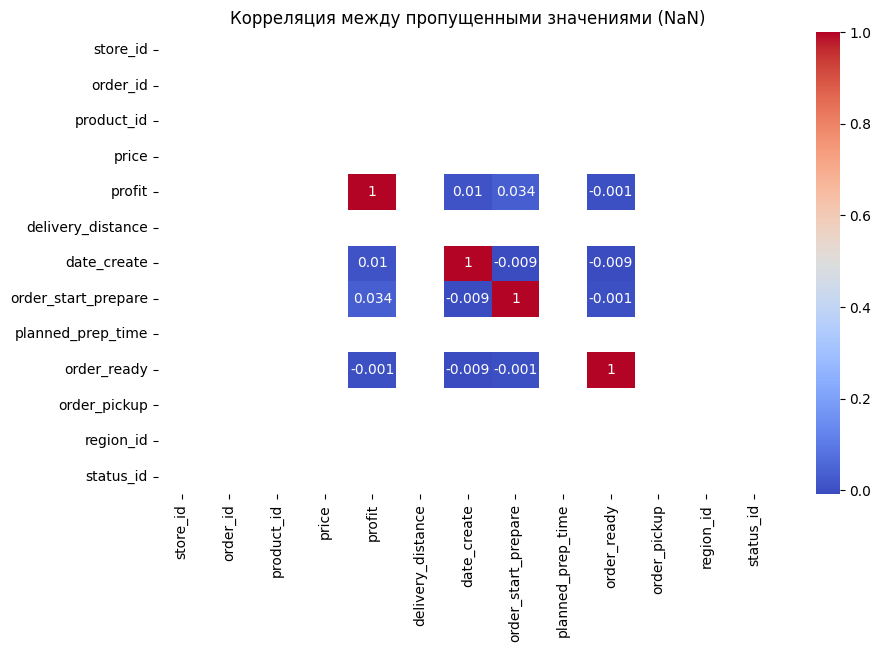

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

nan_indicators = df.isna().astype(int)
nan_corr = round(nan_indicators.corr(), 3)

plt.figure(figsize=(10, 6))
sns.heatmap(nan_corr, annot=True, cmap='coolwarm')

plt.title('Корреляция между пропущенными значениями (NaN)')
plt.show()

Можно видеть, что корреляции между пропущенными значениями нет. Значит пропуски можно считать случайными.

In [8]:
import plotly.express as px

fig = px.histogram(df, x='store_id', labels={'store_id': 'ID магазина'}, title='Распределение по магазинам')
fig.update_layout(xaxis_title='ID магазина', yaxis_title='Количество заказов')
fig.show()

Из графика выше можем видеть, что заказы поступали чаще всего с магазинов ID которых лежит в промежутке 3400-3599. Есть также пару промежутков, где количество заказов практически достигло этой величины.

In [9]:
fig = px.histogram(df, x='product_id', labels={'product_id', 'ID продукта'}, title='Распределение по продуктам')
fig.update_layout(xaxis_title='ID продутка', yaxis_title='Количество заказов')
fig.show()

Из графика выше можно видеть, что ни один из продуктов не имеет существенного преобладания перед другим. То есть заказчики не отдавали предпочтенья тому или иному товару в большей степени. Грубо говоря, все продукты заказывали практически одинаково.

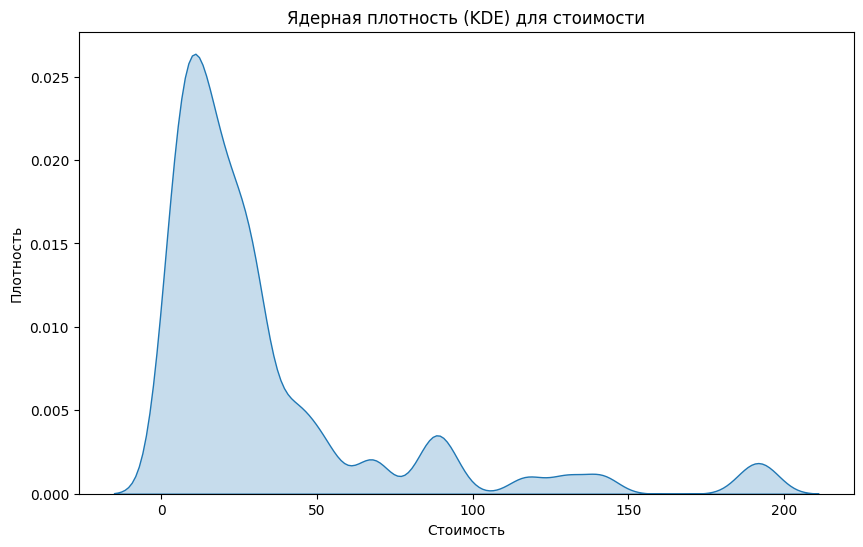

In [10]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df.price < 210].price, shade=True)
plt.title('Ядерная плотность (KDE) для стоимости')
plt.xlabel('Стоимость')
plt.ylabel('Плотность')
plt.show()

Видно, что график унимодальный. Наибольшая плотность стоимости продуктов лежит от 0 до 50 едениц

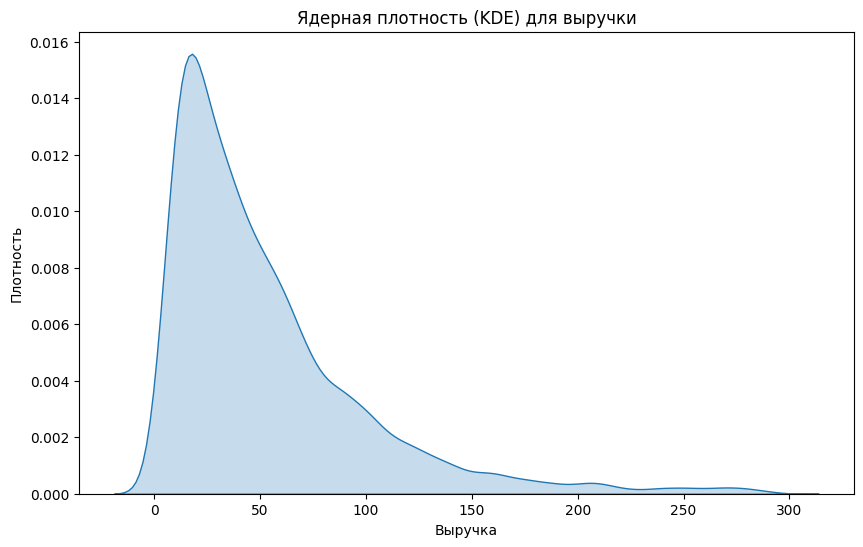

In [11]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df.profit < 300].profit, shade=True)
plt.title('Ядерная плотность (KDE) для выручки')
plt.xlabel('Выручка')
plt.ylabel('Плотность')
plt.show()

Выручка имеет такую же моду и наибольшую плотность на интервале 0-50. График унимодальный

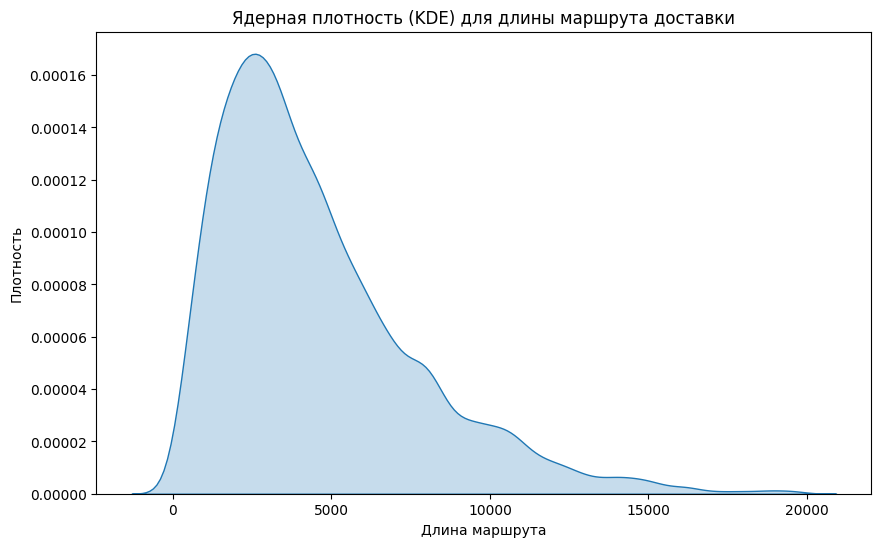

In [12]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df.delivery_distance < 20_000].delivery_distance, shade=True)
plt.title('Ядерная плотность (KDE) для длины маршрута доставки')
plt.xlabel('Длина маршрута')
plt.ylabel('Плотность')
plt.show()

Для длины маршрута график также унимодален. Самые плотные значения лежат чуть ниже 5000 единиц.

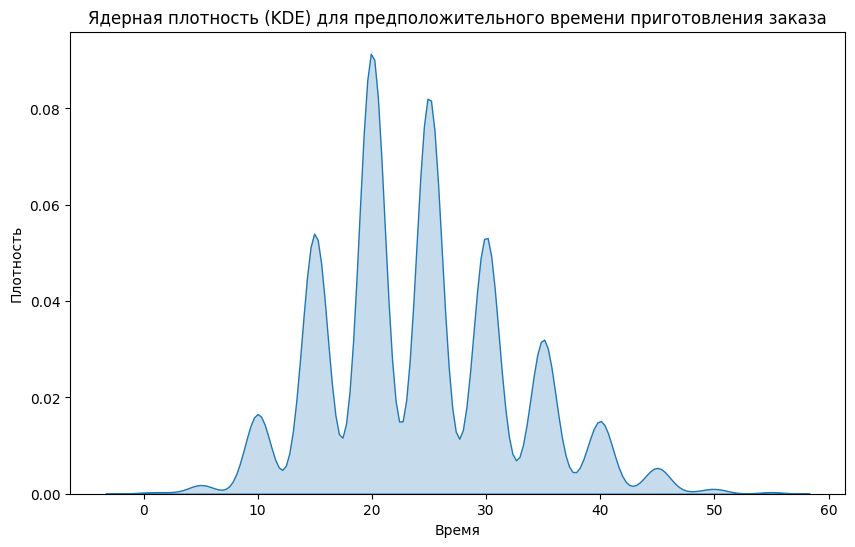

In [13]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df.planned_prep_time < 60].planned_prep_time, shade=True)
plt.title('Ядерная плотность (KDE) для предположительного времени приготовления заказа')
plt.xlabel('Время')
plt.ylabel('Плотность')
plt.show()

Видно, что график выше полимодальный. "Плотнее" всего мода на 20 минутах, вторая после неё - между 20 и 30 минутами. Также можно видеть, что заказов, на выполнение которых заложено менее 10 и более 50 практически нет. Это может говорить о довольно быстрой работе предприятия или отсутсвия спроса на большие заказы :)

## Заполнение пропусков

In [14]:
df['profit'] = df.profit.fillna(df.profit.mean())
 # заполняем пропуски средним значением

df['date_create'] = pd.to_datetime(df['date_create'], format="%Y-%m-%d %H:%M:%S", errors='coerce')
df['order_start_prepare'] = pd.to_datetime(df['order_start_prepare'], format="%Y-%m-%d %H:%M:%S", errors='coerce')
# переводим колонки в формат datetime

df['date_create'] = df.date_create.fillna(method='ffill')
# заполняем пропуски предыдущими значениями

df['order_start_prepare'] = df.order_start_prepare.fillna(
    pd.to_datetime(df.date_create) + (df.order_start_prepare.mean() - df.date_create.mean())
    )
# заполняем пропуски суммой среднего колонки и среднего разницы между ожидаемым временем и реальным

average_delta = (df['order_ready'] - df['order_start_prepare']).mean().total_seconds() / 60
planned_prep_time_avg = df['planned_prep_time'].mean()
total_prep_time = average_delta + planned_prep_time_avg
# Рассчитываем среднее время завершения подготовки и плановое среднее время
# Суммируем их, чтобы получить общее время подготовки.

df['order_ready'] = df['order_ready'].fillna(
    df['order_start_prepare'] + pd.to_timedelta(total_prep_time, unit='m')
)
# Заполняем пропуски, добавляя общее время подготовки к 'order_start_prepare'.

Изучив датасет можно видеть, что порядок записей идёт снизу вверх. То есть самое старое значение будет иметь самый большой ID. Исходя из этого и небольшого количества пропусков в 'date_create' заполняем колонку предыдущими значениями

In [15]:
df.isna().sum()

,0
store_id,0
order_id,0
product_id,0
price,0
profit,0
delivery_distance,0
date_create,0
order_start_prepare,0
planned_prep_time,0
order_ready,0


Проверяем количество пропусков и видим, что успешно избавились от них

## Проверка на наличие аномалий (выбросов) и избавление от них

### Анализ выбросов

In [16]:
def find_outliers(data, feature, threshold = 1.5):
    IQR = data[feature].quantile(0.75) - data[feature].quantile(0.25)
    low = data[feature].quantile(0.25) - (IQR * threshold)
    up = data[feature].quantile(0.75) + (IQR * threshold)
    outliers = pd.concat([data[feature] < low, data[feature] > up], axis=1)
    outliers_index = outliers.any(axis=1)
    return outliers_index

Воспользуемся функцией из практики для поиска выбросов по квантилям. Заранее инициализируем её

In [17]:
fig = px.box(df, y='price', title='Распределение выбросов по ценам')
fig.update_layout(yaxis_title='Цена')
fig.show()

Явно видно, что график сильно сплющен. Точки экстремально далеко от основной области - много выбросов.

In [18]:
fig = px.box(df, y='profit', title='Распределение выбросов по выручке')
fig.update_layout(yaxis_title ='Выручка')
fig.show()

Аналогично график очень сплющен. Видно большое количество выбросов.

In [19]:
fig = px.box(df, y='delivery_distance', title='Распределение выбросов по длине маршрута доставки')
fig.update_layout(yaxis_title = 'Длина маршрута доставки')
fig.show()

Аналогичная ситуация с длинами маршрутов доставки.

In [20]:
fig = px.box(df, y='planned_prep_time', title='Распределение выбросов по предполагаемому времени приготовления заказа')
fig.update_layout(yaxis_title= 'Предполагаемое время приготовления заказа')
fig.show()

Также имеем выбросы выше графика. Но уже видно, что граф менее сплющен и имеет выбросы снизу

### Избавление от выбросов путём замены

In [21]:
price_outliers = find_outliers(df, 'price')
profit_outliers = find_outliers(df, 'profit')
distance_outliers = find_outliers(df, 'delivery_distance')
time_outliers = find_outliers(df, 'planned_prep_time')

Используем функцию и находим наши выбросы

In [22]:
no_price_outliers = df['price'][~price_outliers]
no_profit_outliers = df['profit'][~profit_outliers]
no_distance_outliers = df['delivery_distance'][~distance_outliers]
no_time_outliers = df['planned_prep_time'][~time_outliers]

Вычленяем выбросы, полученные с помощью функции, оставив колонки без них. Проверим, действительно ли функция нашла хотя бы бОльшую часть выбросов.

In [23]:
fig = px.box(no_price_outliers, y='price', title = 'Распределение значений без выбросов для цены')
fig.update_layout(yaxis_title="Цена")
fig.show()

In [24]:
fig = px.box(no_profit_outliers, y='profit', title = 'Распределение значений без выбросов для выручки')
fig.update_layout(yaxis_title="Выручка")
fig.show()

In [25]:
fig = px.box(no_distance_outliers, y='delivery_distance', title = 'Распределение значений без выбросов для длины маршрута доставки')
fig.update_layout(yaxis_title="Длина маршрута доставки")
fig.show()

In [26]:
fig = px.box(no_time_outliers, y='planned_prep_time', title = 'Распределение значений без выбросов для предполагаемого времени приготовления заказа')
fig.update_layout(yaxis_title="Предполагаемое время приготовления заказа")
fig.show()

In [27]:
df.loc[price_outliers, 'price'] = df['price'].mode()
df.loc[profit_outliers, 'profit'] = df['profit'].mode()
df.loc[distance_outliers, 'delivery_distance'] = df['delivery_distance'].mode()
df.loc[time_outliers, 'planned_prep_time'] = df['planned_prep_time'].mean()

Заменяем выбросы на моду или среднее. Выбор был сделан после анализа графика переменной

## Создание новых переменных, преобразования и последующий анализ

Для добавления каждой из переменных данные датасетов были представлены в виде словаря и с помощью метода .map() преобразованы в значения, соответствующие id в таблице.

In [28]:
stores_map = stores_df.set_index('store_id')['store_name'].to_dict()
df['store_name'] = df['store_id'].map(stores_map)

In [29]:
products_map = products_df.set_index('product_id')['product_name'].to_dict()
df['product_name'] = df['product_id'].map(products_map)

In [30]:
regions_map = regions_df.set_index('region_id')['delivery_region_name'].to_dict()
df['region_name'] = df['region_id'].map(regions_map)

In [31]:
df['items_count'] = df.groupby('date_create')['product_name'].transform('count')
df['order_price'] = df.groupby('date_create')['price'].transform('sum')

Создали количество продуктов в заказе и сумму заказа путём группировки по дате создания. Таким образом колонки созданные в одно время, созданные с точностью до секунд будут считаться одним заказом. Далее по цене или имени продукта посчитали необходимое значение

In [32]:
df = df.drop('price', axis=1)

Удаляем ненужную более для анализа колонку со значением цены каждого товара

In [33]:
fig = px.histogram(df, x='product_name', labels={'product_name', 'Имя продукта'}, title='Распределение заказов по продуктам (с названиями продуктов)')
fig.update_layout(xaxis_title = 'Название продукта', yaxis_title = 'Количество заказанных')
fig.show()

In [34]:
df = df.drop('product_id', axis=1)
df = df.drop_duplicates()

Удаляем ненужную колонку с id продуктов

In [35]:
df['day_of_week'] = df['order_start_prepare'].dt.day_name()
df['hour_start'] = df['order_start_prepare'].dt.hour
df['minutes_start'] = df['order_start_prepare'].dt.minute

Создаём новые колонки для более удобного формата работы

In [36]:
df.describe()

,store_id,order_id,profit,delivery_distance,date_create,order_start_prepare,planned_prep_time,order_ready,region_id,items_count,order_price,hour_start,minutes_start
count,19644.000000,1.964400e+04,18348.000000,18972.000000,19644,19644,19644.000000,19644,19644.000000,19644.000000,19644.000000,19644.000000,19644.000000
mean,6712.928019,2.054895e+07,44.438429,4214.166878,2024-09-04 13:21:02.575341056,2024-09-04 13:23:17.965831424,23.977358,2024-09-04 13:47:53.451219968,690.634189,3.900886,62.908273,15.182906,29.348096
min,3053.000000,2.053583e+07,0.979600,6.000000,2024-09-03 15:01:24,2024-09-03 15:02:04,5.000000,2024-09-03 15:10:42,683.000000,1.000000,0.000000,0.000000,0.000000
25%,3970.000000,2.054205e+07,20.145000,2190.000000,2024-09-03 21:49:21.500000,2024-09-03 21:50:54.500000,20.000000,2024-09-03 22:13:08,683.000000,2.000000,29.970000,12.000000,15.000000
50%,5955.000000,2.054898e+07,40.937800,3638.000000,2024-09-04 14:22:51,2024-09-04 14:25:10.500000,25.000000,2024-09-04 14:49:13.500000,685.000000,3.000000,53.390000,16.000000,29.000000
75%,9321.500000,2.055534e+07,57.275000,5785.250000,2024-09-04 21:21:04,2024-09-04 21:22:24.899613696,30.000000,2024-09-04 21:44:31,695.000000,5.000000,85.192500,19.000000,44.000000
max,11963.000000,2.056276e+07,130.350000,11857.000000,2024-09-05 15:25:25,2024-09-05 15:25:33,45.000000,2024-09-05 15:55:01.791702998,717.000000,16.000000,394.630000,23.000000,59.000000
std,2835.596691,7.729908e+03,28.708131,2630.758126,NaN,NaN,7.850355,NaN,9.831237,2.242468,45.237314,5.297089,17.213046


Проверяем статистические показатели колонок

## Повторный анализ после преобразований

In [37]:
fig = px.histogram(df, x='store_name', labels={'store_name', 'Название магазина'}, title='Количество заказов по магазинам')
fig.update_layout(xaxis_title = 'Название магазина', yaxis_title='Количество заказов')
fig.show()

Из графика видно, что больше всего заказов поступало из KFC в ТЦ Гринвич. В остальном - распределение +- равномерное

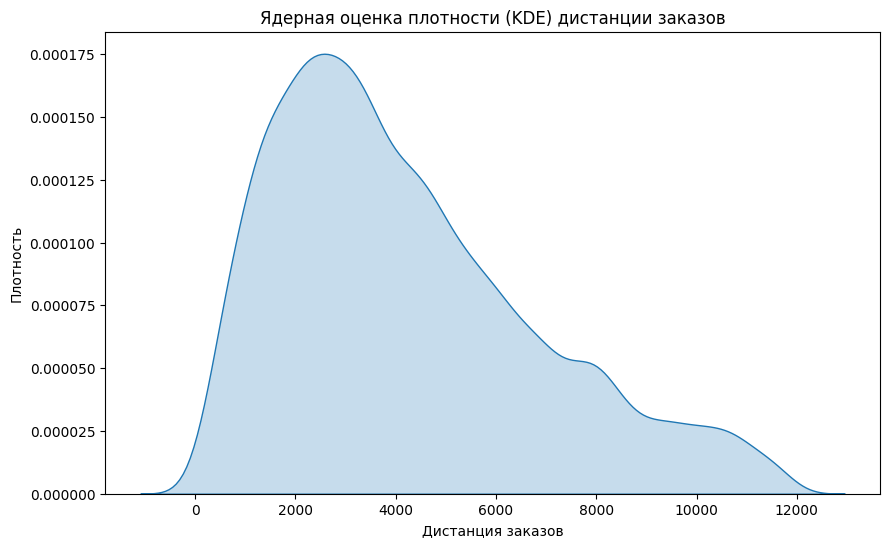

In [38]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df.delivery_distance, shade = True)
plt.title('Ядерная оценка плотности (KDE) дистанции заказов')
plt.xlabel('Дистанция заказов')
plt.ylabel('Плотность')
plt.show()

Видно, что чаще самое плотное значение дистанции лежит в промежутке от 2000 до 4000. График унимодальный

In [39]:
fig = px.histogram(df, x='hour_start', labels={'hour_start', 'Час начала приготовления'}, title='Количество заказов на каждый час')
fig.update_layout(xaxis_title = 'Час начала приготовления', yaxis_title = 'Количество заказов')
fig.show()

Из графика выше видно, что пик заказов приходится на 12 и 19 часов соответственно. С 23 до 7 роста не наблюдается

In [40]:
fig = px.histogram(df, x='minutes_start', labels={'minutes_start', 'Минута начала приготовления'}, title='Количество заказов на каждую минуту часа')
fig.update_layout(xaxis_title='Минута начала приготовления', yaxis_title='Количество заказов')
fig.show()

Видно, что каждую минуту поступало какое-то количество заказов. Какой-то зависимости или закономерности не выявлено.

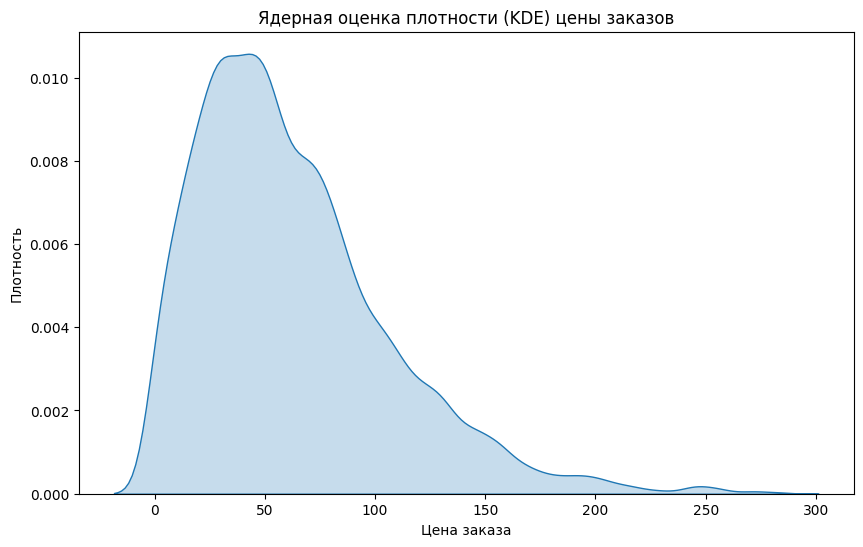

In [41]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df.order_price < 300].order_price, shade = True)
plt.title('Ядерная оценка плотности (KDE) цены заказов')
plt.xlabel('Цена заказа')
plt.ylabel('Плотность')
plt.show()

Видно, что график унимодальный. Самое плотное значение цены заказа в районе 50

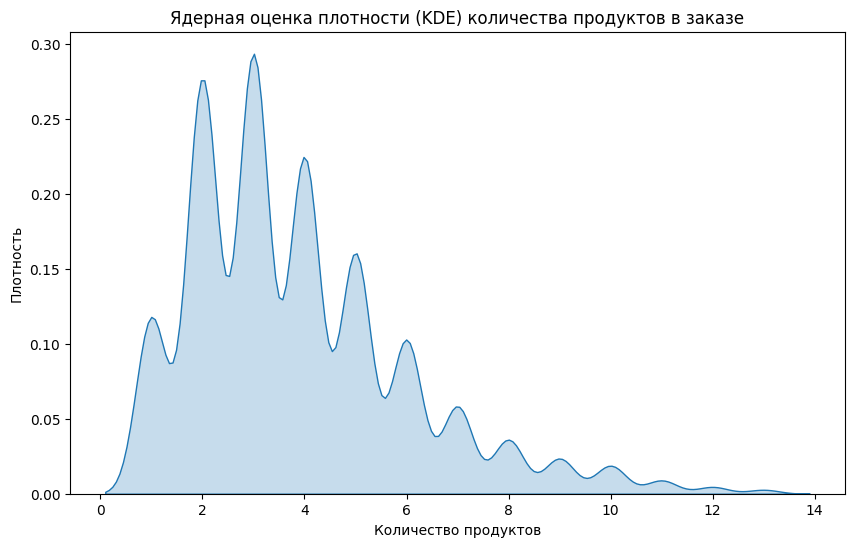

In [42]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df.items_count < 15.0].items_count, shade = True)
plt.title('Ядерная оценка плотности (KDE) количества продуктов в заказе')
plt.xlabel('Количество продуктов')
plt.ylabel('Плотность')
plt.show()

Видно что график полимодальный, для значения более 6 плотность значений сильно падает

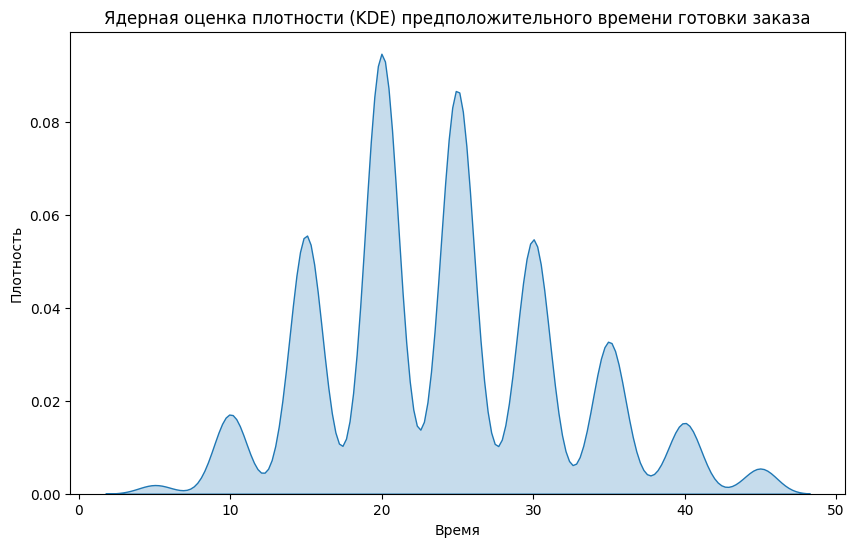

In [43]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df.planned_prep_time, shade = True)
plt.title('Ядерная оценка плотности (KDE) предположительного времени готовки заказа')
plt.xlabel('Время')
plt.ylabel('Плотность')
plt.show()

График полимодальный, но можно видеть, что заказы менее 10 и более 40 минут резко падают в плотности

In [44]:
fig = px.histogram(df, x='region_name', labels={'region_name', 'Название района'}, title='Количество заказов по районам')
fig.update_layout(xaxis_title = 'Название района', yaxis_title = 'Количество заказов')
fig.show()

In [45]:
fig = px.histogram(df, x='day_of_week', labels={'day_of_week', 'День недели'}, title='Количество заказов по дням недели')
fig.update_layout(xaxis_title = 'День недели', yaxis_title='Количество заказов')
fig.show()

## Заключительные преобразования и корреляционный анализ результатов

In [46]:
df = df.drop(['store_name', 'product_name', 'region_name'], axis = 1)
df = df.drop_duplicates()

Избавляемся от уже ненужным переменных

In [47]:
import numpy as np

df['hour_start_sin'] = np.sin(2 * np.pi * df['hour_start'] / 24)
df['hour_start_cos'] = np.cos(2 * np.pi * df['hour_start'] / 24)

Производим циклические преобразования для часовой переменной

In [48]:
df['prepared_on_time'] = ((df['order_ready'] - df['order_start_prepare']).dt.total_seconds() / 60) <= df['planned_prep_time'] + 5

Создаём целевую переменную

In [49]:
df.value_counts()

store_id  order_id  profit  delivery_distance  date_create          order_start_prepare            planned_prep_time  order_ready          order_pickup         region_id  status_id  items_count  order_price  day_of_week  hour_start  minutes_start  hour_start_sin  hour_start_cos  prepared_on_time
3053      20535945  33.180  6615.0             2024-09-03 15:08:25  2024-09-03 15:17:42.000000000  30.0               2024-09-03 15:44:10  03-09-2024 16:12:10  683        F          3            38.47        Tuesday      15          17             -0.707107       -0.707107       True                1
8717      20547679  10.112  4964.0             2024-09-04 13:13:55  2024-09-04 13:47:36.000000000  10.0               2024-09-04 14:02:50  04-09-2024 14:30:50  683        F          2            42.76        Wednesday    13          47             -0.258819       -0.965926       False               1
          20547617  3.081   4991.0             2024-09-04 13:10:31  2024-09-04 13:10:39.000000000  10.0               2024-09-04 13:37:52  04-09-2024 14:05:52  683        F          2            13.30        Wednesday    13          10             -0.258819       -0.965926       False               1
          20547427  17.696  4991.0             2024-09-04 13:09:40  2024-09-04 13:10:05.000000000  15.0               2024-09-04 13:37:41  04-09-2024 14:05:41  683        F          3            69.18        Wednesday    13          10             -0.258819       -0.965926       False               1
          20547379  5.609   1237.0             2024-09-04 13:09:37  2024-09-04 13:11:05.532818176  15.0               2024-09-04 13:33:57  04-09-2024 14:01:57  683        F          4            32.96        Wednesday    13          11             -0.258819       -0.965926       False               1
                                                                                                                                                                                                                                                                                                           ..
4748      20542971  18.565  4819.0             2024-09-03 23:13:07  2024-09-03 23:19:29.000000000  20.0               2024-09-03 23:23:36  03-09-2024 23:51:36  707        F          2            16.74        Tuesday      23          19             -0.258819        0.965926       True                1
          20542847  12.008  7588.0             2024-09-03 23:01:06  2024-09-03 23:09:41.000000000  20.0               2024-09-03 23:29:41  03-09-2024 23:57:41  707        F          3            100.09       Tuesday      23          9              -0.258819        0.965926       True                1
          20542245  36.024  2071.0             2024-09-03 22:03:08  2024-09-03 22:03:13.000000000  25.0               2024-09-03 22:16:16  03-09-2024 22:44:16  707        F          2            14.02        Tuesday      22          3              -0.500000        0.866025       True                1
          20541963  20.145  2100.0             2024-09-03 21:40:41  2024-09-03 21:42:09.532818176  15.0               2024-09-03 21:45:25  03-09-2024 22:13:25  707        F          2            34.42        Tuesday      21          42             -0.707107        0.707107       True                1
11963     20547801  35.471  579.0              2024-09-04 13:20:34  2024-09-04 13:57:18.000000000  10.0               2024-09-04 14:11:19  04-09-2024 14:39:19  697        F          4            54.88        Wednesday    13          57             -0.258819       -0.965926       True                1
Name: count, Length: 7306, dtype: int64

Производим проверку на баланс классов. Можно видеть, что имеется явный дисбаланс классов. Например, по store_id

In [50]:
df_numeric = df.select_dtypes(include=['number']).copy()
df_numeric = pd.concat([df_numeric, df[['prepared_on_time']]], axis = 1)
corr = df_numeric.corr()
corr.style.background_gradient(cmap='coolwarm')

,store_id,order_id,profit,delivery_distance,planned_prep_time,region_id,items_count,order_price,hour_start,minutes_start,hour_start_sin,hour_start_cos,prepared_on_time
store_id,1.000000,-0.018342,-0.056169,0.014139,-0.203985,0.109412,-0.116300,-0.094041,0.021636,-0.011869,-0.016826,0.067869,0.004526
order_id,-0.018342,1.000000,-0.037085,-0.021657,-0.025495,-0.010697,-0.042579,-0.024900,-0.195707,0.025465,0.303906,-0.214204,0.009734
profit,-0.056169,-0.037085,1.000000,0.077396,0.261972,-0.152843,0.281252,0.212068,0.084126,0.006945,-0.112195,0.026532,0.004028
delivery_distance,0.014139,-0.021657,0.077396,1.000000,0.030916,-0.170098,0.079871,0.052151,0.002109,-0.002143,0.001242,0.055903,-0.069645
planned_prep_time,-0.203985,-0.025495,0.261972,0.030916,1.000000,-0.132753,0.203875,0.157437,0.027716,0.017590,-0.034057,-0.035573,0.050856
region_id,0.109412,-0.010697,-0.152843,-0.170098,-0.132753,1.000000,-0.015150,-0.009921,0.023283,0.005712,-0.013053,0.063519,0.021543
items_count,-0.116300,-0.042579,0.281252,0.079871,0.203875,-0.015150,1.000000,0.799381,0.056325,-0.001933,-0.088807,0.059564,-0.030126
order_price,-0.094041,-0.024900,0.212068,0.052151,0.157437,-0.009921,0.799381,1.000000,0.053599,-0.009303,-0.068739,0.050581,-0.024450
hour_start,0.021636,-0.195707,0.084126,0.002109,0.027716,0.023283,0.056325,0.053599,1.000000,-0.016530,-0.748978,0.289793,0.023655
minutes_start,-0.011869,0.025465,0.006945,-0.002143,0.017590,0.005712,-0.001933,-0.009303,-0.016530,1.000000,0.025894,-0.049104,-0.019058


Корреляция между числовыми признакми и целевой переменной. Видна незначительная корреляция между часом начала приготовления заказа и целевой переменной. Помимо этого сильно коррелируют между собой значения количества продуктов и стоимости заказа

In [51]:
!pip install phik -q
import phik
from phik.report import plot_correlation_matrix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 11.8 MB/s eta 0:00:00


Подключаем необходимые для PHI-k корреляции модули

interval columns not set, guessing: ['store_id', 'order_id', 'profit', 'delivery_distance', 'planned_prep_time', 'region_id', 'items_count', 'order_price', 'hour_start', 'minutes_start', 'hour_start_sin', 'hour_start_cos']


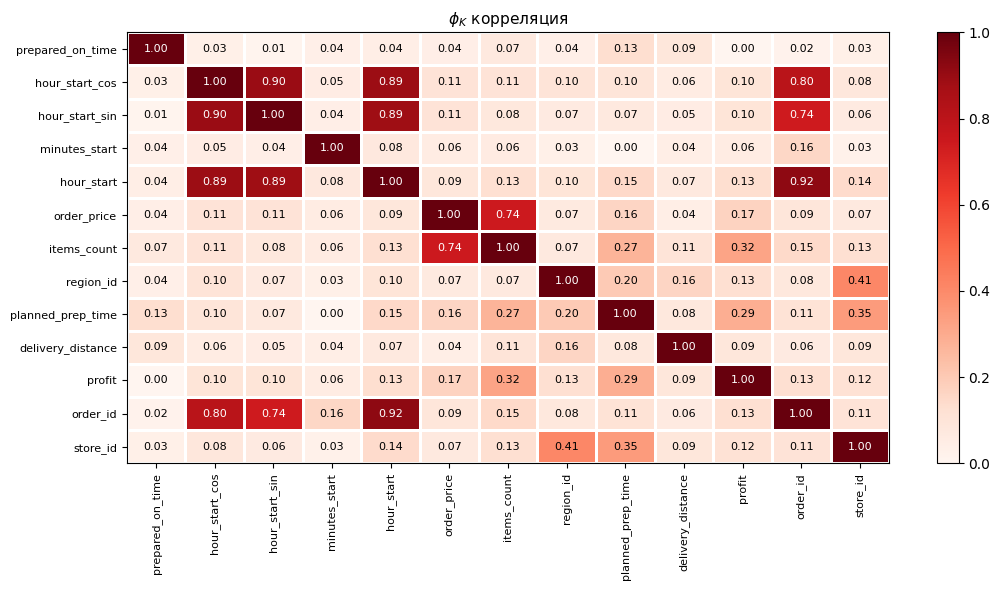

In [52]:
phik_overview = df_numeric.phik_matrix()
plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Reds",
                        title=r"$\phi_K$ корреляция",
                        fontsize_factor=0.8, figsize=(11, 6))
plt.tight_layout()

Из PHI-k корреляции можем видеть коррелирующие между собой значения, которые выделены более тёмно-красным цветом в то время как светлые ячейки говорят нам о практическом отсутствии корреляции.